In [0]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod.csv


In [0]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict
from sklearn.svm import SVC
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#realizando a leitura do arquivo (dataset)
nome_do_arquivo="comp_bikes_mod.csv"
dataset= pd.read_csv(nome_do_arquivo, sep=',')

In [0]:
#apresentando as 5 primeiras linhas do dataset
dataset.head(17379)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.000000,9,1.00000,0.0,1.000000,0.000000,0.0,6.0,0.000000,1.00000,0.497062,0.2879,0.81,0.0000,3.000000,13.000000,16.0
1,2.000000,2011-01-01,1.00000,0.0,1.000000,1.000000,0.0,6.0,0.000000,1.42395,0.220000,0.2727,0.80,0.0000,8.000000,32.000000,40.0
2,3.000000,2011-01-01,1.00000,0.0,1.000000,2.000000,0.0,6.0,0.000000,1.00000,0.220000,0.2727,0.80,0.0000,5.000000,27.000000,32.0
3,4.000000,2011-01-01,1.00000,0.0,1.000000,3.000000,0.0,6.0,0.000000,1.00000,0.240000,0.2879,0.75,0.0000,3.000000,10.000000,13.0
4,5.000000,2011-01-01,1.00000,0.0,1.000000,4.000000,0.0,6.0,0.682118,1.00000,0.240000,0.2879,0.75,0.0000,0.000000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375.000000,2012-12-31,2.50342,1.0,12.000000,19.000000,0.0,1.0,1.000000,2.00000,0.260000,0.2576,0.60,0.1642,11.000000,108.000000,119.0
17375,17376.000000,2012-12-31,1.00000,1.0,12.000000,20.000000,0.0,1.0,1.000000,2.00000,0.260000,0.2576,0.60,0.1642,35.583147,153.644972,89.0
17376,17377.000000,9,1.00000,1.0,12.000000,21.000000,0.0,1.0,1.000000,1.00000,0.260000,0.2576,0.60,0.1642,7.000000,83.000000,90.0
17377,8676.513842,2012-12-31,1.00000,1.0,6.536091,11.521258,0.0,1.0,1.000000,1.00000,0.260000,0.2727,0.56,0.1343,13.000000,48.000000,61.0


In [0]:
dataset.info() #verificando os tipos de variáveis e se existem ou não valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  float64
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  float64
 3   yr          17379 non-null  float64
 4   mnth        17379 non-null  float64
 5   hr          17379 non-null  float64
 6   holiday     17379 non-null  float64
 7   weekday     17379 non-null  float64
 8   workingday  17379 non-null  float64
 9   weathersit  17379 non-null  float64
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  float64
 15  registered  17379 non-null  float64
 16  cnt         17379 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


**Existem Colunas Com Valores Nulos?**

In [0]:
dataset.shape

(17379, 17)

**Quantas Instâncias e Características Existem no Dataset?**



In [0]:
#analisando a "estatística" do dataset
dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8676.513842,2.503420,0.501758,6.536091,11.521258,0.028131,2.999233,0.682118,1.423950,0.497062,0.476281,0.627579,0.189247,35.583147,153.644972,189.919826
std,4753.606978,1.050789,0.474351,3.264863,6.562575,0.156867,1.902382,0.441769,0.606188,0.182573,0.163665,0.182993,0.115917,46.700017,143.962313,172.633175
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4814.500000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.360000,0.348500,0.490000,0.104500,5.000000,42.000000,50.000000
50%,8676.513842,2.503420,0.501758,6.536091,11.521258,0.000000,3.000000,1.000000,1.000000,0.497062,0.476281,0.627579,0.189247,21.000000,135.000000,168.000000
75%,12530.000000,3.000000,1.000000,9.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.606100,0.770000,0.253700,43.000000,204.000000,260.000000
max,17377.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Qual é o Valor Médio Para os Pesos Declarados?**

In [0]:
#identificando possíveis outliers
dataset.fillna(dataset.mean(), inplace=True)
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,9,1.0,0.0,1.0,0.0,0.0,6.0,0.000000,1.00000,0.497062,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.000000,1.42395,0.220000,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.000000,1.00000,0.220000,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.000000,1.00000,0.240000,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,0.682118,1.00000,0.240000,0.2879,0.75,0.0,0.0,1.0,1.0


In [0]:
dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8676.513842,2.503420,0.501758,6.536091,11.521258,0.028131,2.999233,0.682118,1.423950,0.497062,0.476281,0.627579,0.189247,35.583147,153.644972,189.919826
std,4753.606978,1.050789,0.474351,3.264863,6.562575,0.156867,1.902382,0.441769,0.606188,0.182573,0.163665,0.182993,0.115917,46.700017,143.962313,172.633175
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4814.500000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.360000,0.348500,0.490000,0.104500,5.000000,42.000000,50.000000
50%,8676.513842,2.503420,0.501758,6.536091,11.521258,0.000000,3.000000,1.000000,1.000000,0.497062,0.476281,0.627579,0.189247,21.000000,135.000000,168.000000
75%,12530.000000,3.000000,1.000000,9.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.606100,0.770000,0.253700,43.000000,204.000000,260.000000
max,17377.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


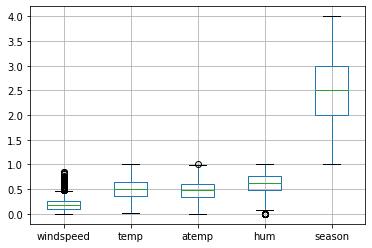

In [0]:
boxplot = dataset.boxplot(column=['windspeed','temp','atemp','hum','season'])

In [0]:
print(dataset["hum"][dataset["cnt"]!=0])

0        0.81
1        0.80
2        0.80
3        0.75
4        0.75
         ... 
17374    0.60
17375    0.60
17376    0.60
17377    0.56
17378    0.65
Name: hum, Length: 17379, dtype: float64


In [0]:
dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8676.513842,2.503420,0.501758,6.536091,11.521258,0.028131,2.999233,0.682118,1.423950,0.497062,0.476281,0.627579,0.189247,35.583147,153.644972,189.919826
std,4753.606978,1.050789,0.474351,3.264863,6.562575,0.156867,1.902382,0.441769,0.606188,0.182573,0.163665,0.182993,0.115917,46.700017,143.962313,172.633175
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4814.500000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.360000,0.348500,0.490000,0.104500,5.000000,42.000000,50.000000
50%,8676.513842,2.503420,0.501758,6.536091,11.521258,0.000000,3.000000,1.000000,1.000000,0.497062,0.476281,0.627579,0.189247,21.000000,135.000000,168.000000
75%,12530.000000,3.000000,1.000000,9.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.606100,0.770000,0.253700,43.000000,204.000000,260.000000
max,17377.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Existem Possíveis Outliers?**

In [174]:
#realizando a análise de regressão
x=dataset['hum'].values  #variável independente 
Y=dataset['cnt'].values #variável dependente
z=dataset['casual'].values  #variável independente  

print(x<0)
print(Y<0)
print(z<0)

[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]


In [0]:
print(dataset["casual"])

In [0]:
dataset.fillna(value =- 1, inplace=True)

In [0]:
#importa o modelo de regressão linear univariada
from sklearn.linear_model import LinearRegression

In [0]:
#Realiza a construção do modelo de regressão
reg= LinearRegression()
x_Reshaped=x.reshape((-1, 1)) #coloca os dados no formato 2D
z_Reshaped=z.reshape((-1, 1))
regressao= reg.fit (x_Reshaped,Y) # encontra os coeficientes (realiza a regressão)
regressao2= reg.fit (z_Reshaped,Y) # encontra os coeficientes (realiza a regressão)

In [0]:
#realiza a previsão
previsao=reg.predict(x_Reshaped)
previsao2=reg.predict(z_Reshaped)


In [0]:
#análise do modelo
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)

In [181]:
#parâmetros encontrados
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

R_2 = r2_score(Y, previsao)

print("Coeficiente de Determinação (R2):", R_2)


Y = [2.32407506]X 107.22192175228169
Coeficiente de Determinação (R2): -0.22291399154790326


In [193]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict
modelos= [DecisionTreeClassifier(random_state=42)]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
mean=[]
std=[]

for model in modelos:
        result = cross_val_score(model, x, Y, cv=kfold, scoring='accuracy',n_jobs=-1)
        mean.append(result)
        std.append(result)
classificadores = ['Regressão Logistica',R_2]

plt.figure(figsize=(20,10))
for i in range(len(mean)):
    sns.distplot(mean[i], hist=False, kde_kws={"shade":True})
    
plt.title("Distribuição de cada um dos classificadores",fontsize=15)
plt.legend(classificadores)
plt.xlabel('Acuracia',labelpad=20)
plt.yticks([])
    
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


**Pelo Coefiente de Determinação, o Que É Possível Afirmar Sobre a Relação Entre as Variáveis Peso Real x Peso Declarado?**

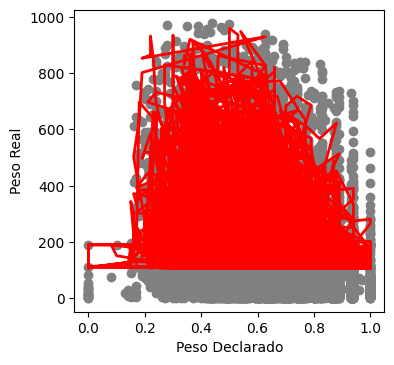

In [188]:
#realiza o plot dos dados
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(x, Y,  color='gray') #realiza o plot do gráfico de dispersão
plt.plot(x, previsao2, color='red', linewidth=2) # realiza o plto da "linha"
plt.xlabel("Peso Declarado")
plt.ylabel("Peso Real")

plt.show()

Coeficiente de Determinação (R2): 0.09143957378490208


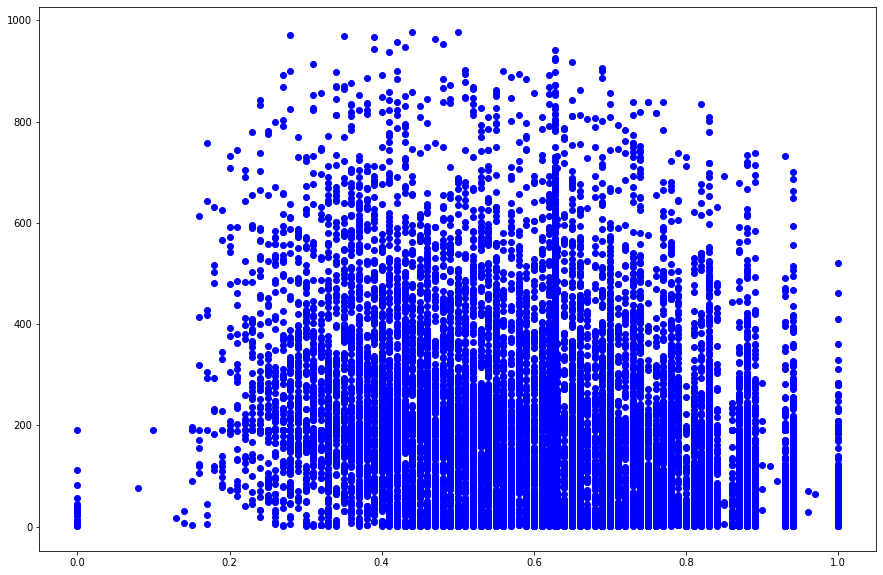

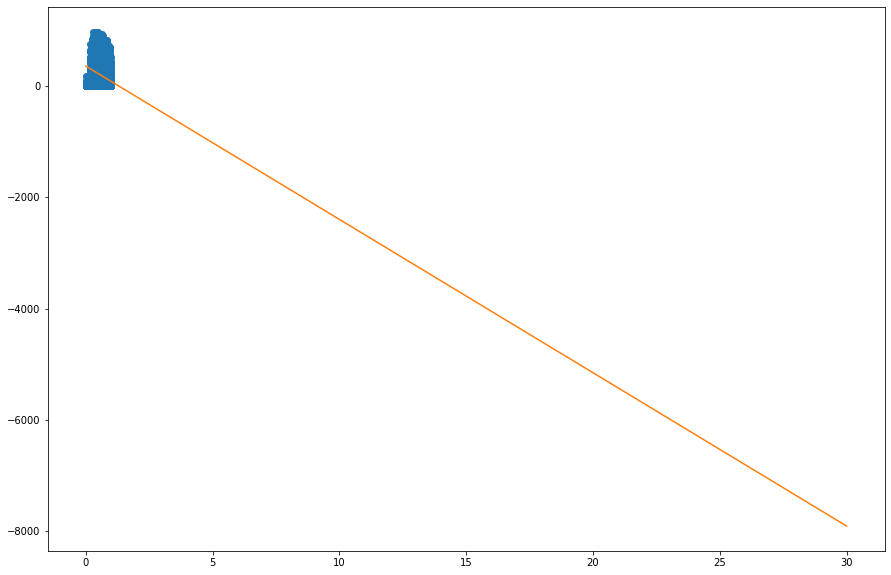

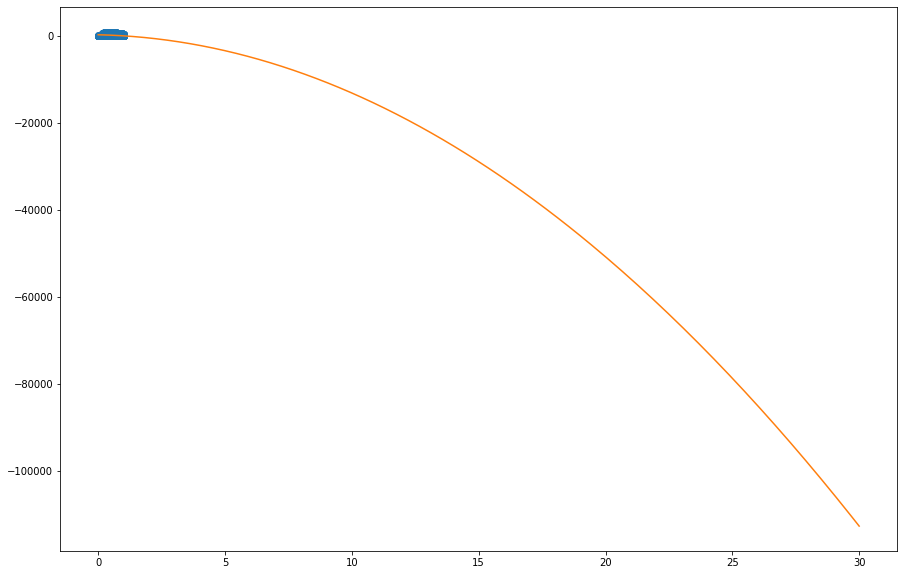

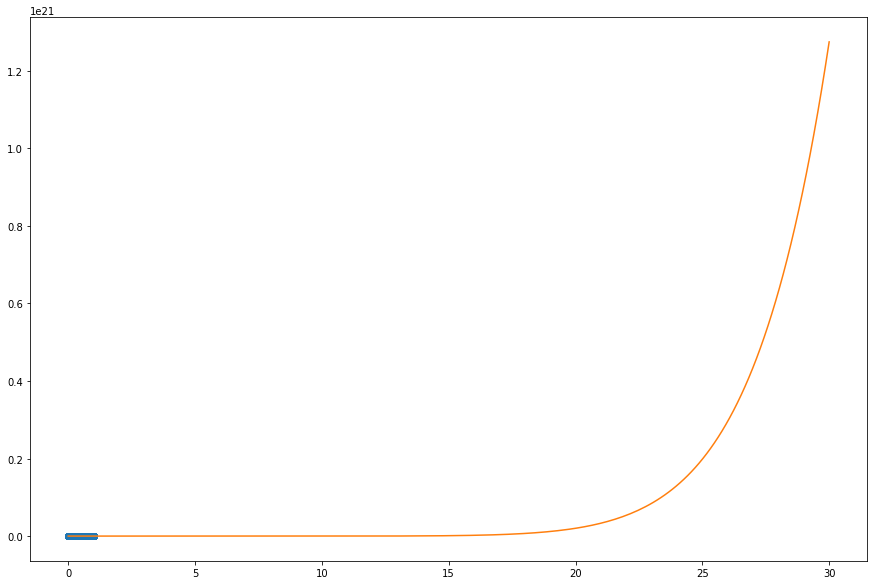

In [198]:
 df=pd.DataFrame(list(zip(x, Y)), 
               columns =['X', 'Y'])
 
 plt.figure(figsize=(15,10))
plt.scatter(df.X,df.Y,c="b")

linear = np.poly1d(np.polyfit(df['X'], df.Y, 1))

quadratica = np.poly1d(np.polyfit(df.X, df.Y, 2))
alto_grau = np.poly1d(np.polyfit(df.X, df.Y, 10))
t = np.linspace(0, 30, 200)
plt.figure(figsize=(15,10))
plt.plot(df.X, df.Y, 'o', t, linear(t), '-')
plt.figure(figsize=(15,10))
plt.plot(df.X, df.Y, 'o', t, quadratica(t), '-')
plt.figure(figsize=(15,10))
plt.plot(df.X, df.Y, 'o', t, alto_grau(t), '-')
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)
R_2 = r2_score(df.Y, alto_grau(df.X))  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)
